透過Python進行科學計算
---

任務一，練習寫出一個遞迴關係式

我要做的任務是:

(數學上定義完整了) $a_{n+1} = 2a_{n}+3$, $a_1 = 4$

(程式上定義完整了) 然後我要用一個list a來儲存它, 透過for迴圈來計算每一個$a_{n}$, 最多算到n=10

(演算法) an 是目前算的答案, 算完之後放到a裡面

這還沒有到達科學計算的level，就是一個檢定。自己能不能寫出來的過程

In [ ]:
#上課內容

n = 10
a = [4]
an = 4
for i in range(n):
  an = 2*an+3
  a.append(an)
print(a)

[4, 11, 25, 53, 109, 221, 445, 893, 1789, 3581, 7165]


In [ ]:
#上課內容

# 這個是完整地問chatGPT的答案
# 初始化列表a
a = [4]

# 循环计算an并添加到列表a中
for n in range(1, 11):
    an = 2 * a[n - 1] + 3
    a.append(an)

# 打印列表a
print("计算结果：", a)


计算结果： [4, 11, 25, 53, 109, 221, 445, 893, 1789, 3581, 7165]


In [ ]:
# 自己寫的

def function( num ):
    if num == 1 :
        return 4
    else :
        return 2*function(num-1)+3

for i in range(1,11):
    print( f"a{i} = {function(i)}" ) 

任務二，求解一個方程式的根

我的問題就是求二次多項式的根，二次多項式是一個長得像 $ax^2+bx+c=0$

(數學上) 給定$a$,$b$,$c$, 求$ax^2+bx+c=0$的根

(程式上) 輸入Input: $a$,$b$,$c$,  輸出output: $x$

(演算法) $x = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$

遇到困難:
1. 發現根號要引入package, math
2. 發現math domain error
3. ...

延伸這個問題


這個任務是練習定義問題，找演算法

In [ ]:
#上課內容

import math

a = int(input('input a: '))
b = int(input('input b: '))
c = int(input('input c: '))

x1 = (-b - math.sqrt(b**2-4*a*c))/2/a  # sqrt要找package
x2 = (-b + math.sqrt(b**2-4*a*c))/2/a

print(f'x1= {x1}, x2={x2}')

input a: 2
input b: 3
input c: -4
x1= -2.350781059358212, x2=0.8507810593582121


In [ ]:
# 自己寫的
from math import sqrt

a = int(input('input a: '))
b = int(input('input b: '))
c = int(input('input c: '))


d = sqrt(b**2-4*a*c)

print(f'x1= {(-b+d)/(2*a)}, x2={(-b-d)/(2*a)}')

求解$f(x)=ax^3+bx^2+cx+d=0$的一個根

用牛頓法做這個問題
$x_{n+1} = x_{n} - f(x_n)/f'(x_n)$, $x_1$是初始值, 而且$x_1$是需要給定的

在$f(x_n) < 0.00000000001$的時候我要把$x_n$當成多項式的根(錯)

要寫成$|f(x_n)|< 0.00000000001$才是對的

遇到困難:

input: a,b,c,d, output: x


In [14]:
#上課內容

# 定義常數
a = 2
b = 3
c = 1
d = -4
x1 = -4

# 演算法
x = x1
y = a*x**3+b*x**2+c*x+d
while abs(y) >= 0.00000000001:
  x = x - (a*x**3+b*x**2+c*x+d)/(3*a*x**2+2*b*x+c)
  y = a*x**3+b*x**2+c*x+d
print(f'x={x}, y={y}')


x=0.8260051790615119, y=-8.881784197001252e-16


In [ ]:
#上課內容

# 定義多項式函數
# f(x)= ax^3+b*x^2+c*x+d
def f(x):
    return a * x**3 + b * x**2 + c * x + d # f(x)= ax^3+b*x^2+c*x+d

# 定義多項式函數的導數
def f_prime(x):
    return 3 * a * x**2 + 2 * b * x + c

# 定義牛頓法
# 給定函數 f(x), 求f(x)=0的根
# x_{n+1} = x_{n} - f(x_n)/f'(x_n)
# (1) x_1 = 1 --> x_3  -->
#   for i in range(2):
#      x = x-f(x)/f_prime(x)
#   print(x)
# (2) 如果我需要|f(x_n)|<0.000000001，試求n=?
# def newton_method(x, tolerance=1e-10, max_iterations=1e4):
#   for i in range(max_iteration):      1e4=10000 ==> max_iteration
#      x = x-f(x)/f_prime(x)
#      if abs(f(x))< tolerance :  1e-10=1x10^(-10) ==> tolerance
#        break
#   如果跑完10000次，還是要檢查一下是不是不答案
#   return x

def newton_method(guess, tolerance=1e-10, max_iterations=100):
    x = guess
    iterations = 0
    while abs(f(x)) > tolerance and iterations < max_iterations:
        x = x - f(x) / f_prime(x)  # x_{n+1} = x_{n} - f(x_n)/f'(x_n)
                         # x_n = n
                         # x = x+1 --> x_{n+1} = x_{n}+1
        iterations += 1
    if abs(f(x)) <= tolerance:
        return x
    else:
        print("未能找到解，达到最大迭代次数。")
        return None

# 系數設定
a = 1
b = 2
c = -3
d = -2

# 起始猜測值
initial_guess = 1.0

# 執行牛頓法
root = newton_method(initial_guess)

if root is not None:
    print("方程的根是:", root)


方程的根是: 1.3429230827771708


In [10]:
#自己寫的

def newton(x0, a, b, c, d):
    e=1e-6
    x_n = x0 - ((a * x0 ** 3 + b * x0 ** 2 + c * x0 + d) / (3 * a * x0 ** 2 + 2 * b * x0 + c))
    while abs(x_n - x0) > e:
        x0 = x_n
        x_n = x0 - ((a * x0 ** 3 + b * x0 ** 2 + c * x0 + d) / (3 * a * x0 ** 2 + 2 * b * x0 + c))
    return x_n

a = int(input('input a: '))
b = int(input('input b: '))
c = int(input('input c: '))
d = int(input('input d: '))
x0 = int(input('input x0: '))

x1 = newton(x0 , a , b ,c ,d )
x2 = newton(x1 , a , b ,c ,d )
print( x0 , x1 , x2 )

-4 0.8260051790615119 0.826005179061512


In [ ]:
#自己寫的

import sympy as sy

a = int(input('input a: '))
b = int(input('input b: '))
c = int(input('input c: '))
d = int(input('input d: '))

x = sy.Symbol('x')
f = a*x**3 + b*x**2 + c*x + d
print( sy.solve(f) )

任務三，求解一個函數的微分是多少？
任務三'，求解一個函數的積分是多少？

求f(x)=a*x^2+b*x+c的微分, 2*a*x+b
如果是一般的函數f(x),

$$f'(x) = \lim\limits_{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}$$
   近似於(f(x+h)-f(x))/h, h=0.0001

1. I/O: input: x, output: 微分的近似值
2. Algorithm: (f(x+h)-f(x))/h

...
h ~ 0.1, 0.01, 0.001, ... 1e-8 還可以

h = 1e-8, 1e-9, ... 1e-15越來越慘

h < 1e-16 ??? 1+h=1???


In [ ]:
#上課內容

import math

def f(x):
  # 經過一個很複雜的程序之後
  return math.sin(x)

def Df(x,h):
  return (f(x+h)-f(x))/h

h = 1
for i in range(20):
  print(f'h = {h}, error: {abs(Df(1,h)-math.cos(1))} compute:{Df(1,h)}')
  h = h / 10

h = 1, error: 0.47247586385035456 compute:0.0678264420177852
h = 0.1, error: 0.04293855333275065 compute:0.4973637525353891
h = 0.01, error: 0.00421632485627077 compute:0.536085981011869
h = 0.001, error: 0.0004208255078128609 compute:0.5398814803603269
h = 0.0001, error: 4.207444951864758e-05 compute:0.5402602314186211
h = 1e-05, error: 4.207362275021609e-06 compute:0.5402980985058647
h = 1.0000000000000002e-06, error: 4.2074680950410226e-07 compute:0.5403018851213303
h = 1.0000000000000002e-07, error: 4.182769119953633e-08 compute:0.5403022640404486
h = 1.0000000000000002e-08, error: 2.969885337655853e-09 compute:0.5403023028982544
h = 1.0000000000000003e-09, error: 5.2541265893601974e-08 compute:0.5403023584094057
h = 1.0000000000000003e-10, error: 5.848103656891368e-08 compute:0.5403022473871032
h = 1.0000000000000003e-11, error: 1.1687040611940702e-06 compute:0.5403011371640786
h = 1.0000000000000002e-12, error: 4.324021692381219e-05 compute:0.5403455460850636
h = 1.00000000000000

In [ ]:
#自己寫的 ( 求 ax^2 + bx + c 的微分與積分 )

import math

def f(x , a , b, c ):
    return a * x**2 + b * x + c

def Df(x,h):
  return (f(x+h , a , b ,c )-f(x , a ,b ,c ))/h

a = int(input('input a: '))
b = int(input('input b: '))
c = int(input('input c: '))


h = 1
for i in range(20):
    print(f'h = {h}, error: {abs(Df(1,h)-math.cos(1))} compute:{Df(1,h)}')
    h = h / 10

In [ ]:
#自己寫的

import sympy as sy

a = int(input('input a: '))
b = int(input('input b: '))
c = int(input('input c: '))

x = sy.Symbol('x')
f = a*x**2 + b*x + c
print( sy.diff(f) )

In [ ]:
#自己寫的

import sympy as sy

a = int(input('input a: '))
b = int(input('input b: '))
c = int(input('input c: '))

x = sy.Symbol('x')
f = a*x**2 + b*x + c
print( f"{sy.integrate(f)} + Constant" )

任務四：求解一個微分方程的答案

這開始有一點點要脫離舒適圈，找一個之前沒有想過的答案

定義問題:

決定輸入輸出:

採取何種演算法:

例子:
模擬單擺。(這樣一句話是沒有說明什麼的)

下面這邊就是你看到這樣的問題後，自問自答:
1. 我想要在電腦中，看到單擺的擺動.

好的，那麼這個單擺該怎麼設定呢？

2. 那我們把單擺的長度L設定成1，一端固定在原點(0,0)，另一端繫一顆小球質量m。一開始往旁邊拉一個角度$\theta_0$。重力加速度g。

好的，它質點的運動會滿足什麼方程式呢？

3. 它應該會滿足往下有重力F=mg，然後投影在x方向:
$$m x'' = -mg \sin(\theta) \cos(\theta) = -mg \frac{x\sqrt{L^2-x^2}}{L^2} $$

數學問題:





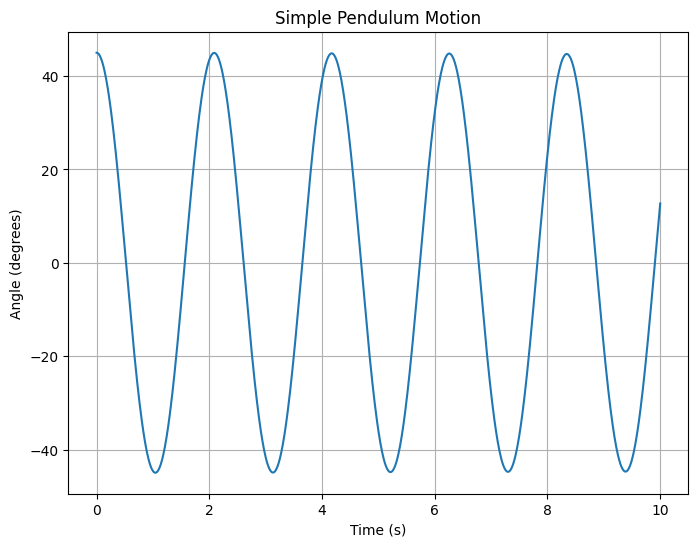

In [ ]:
# 上課內容

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def simple_pendulum(t, y, L, g):
    """
    定義單擺的微分方程式。
    y[0] 是角度，y[1] 是角速度。
    """
    dydt = [y[1], -g/L * np.sin(y[0])]
    return dydt

# 單擺的參數
L = 1.0  # 擺長
g = 9.8  # 重力加速度

# 初始條件：初始角度和初始角速度
theta0 = np.radians(45)  # 初始角度（45度）
omega0 = 0.0  # 初始角速度

# 定義時間範圍
t_span = (0, 10)  # 從 t=0 到 t=10

# 解微分方程
sol = solve_ivp(simple_pendulum, t_span, [theta0, omega0], args=(L, g), t_eval=np.linspace(0, 10, 1000))

# 繪製角度隨時間變化的圖表
plt.figure(figsize=(8, 6))
plt.plot(sol.t, np.degrees(sol.y[0]))
plt.title('Simple Pendulum Motion')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

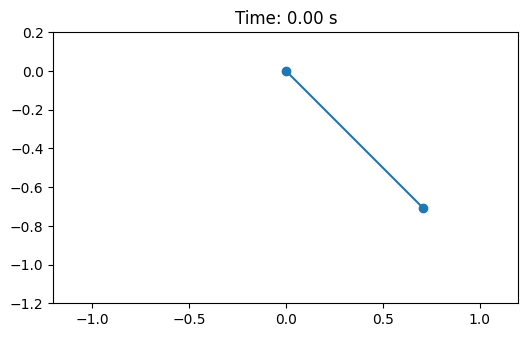

In [ ]:
#上課內容

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def simple_pendulum(t, y, L, g):
    """
    定義單擺的微分方程式。
    y[0] 是角度，y[1] 是角速度。
    """
    dydt = [y[1], -g/L * np.sin(y[0])]
    return dydt

# 單擺的參數
L = 1.0  # 擺長
g = 9.8  # 重力加速度

# 初始條件：初始角度和初始角速度
theta0 = np.radians(45)  # 初始角度（45度）
omega0 = 0.0  # 初始角速度

# 定義時間範圍
t_span = (0, 10)  # 從 t=0 到 t=10

# 解微分方程
sol = solve_ivp(simple_pendulum, t_span, [theta0, omega0], args=(L, g), t_eval=np.linspace(0, 10, 1000))

# 創建動畫
fig, ax = plt.subplots(figsize=(6, 6))

# 定義更新函數
def update(i):
    ax.clear()
    # 繪製單擺
    x = L * np.sin(sol.y[0, i])
    y = -L * np.cos(sol.y[0, i])
    ax.plot([0, x], [0, y], marker='o')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 0.2)
    ax.set_aspect('equal')
    ax.set_title(f'Time: {sol.t[i]:.2f} s')

# 創建動畫
ani = FuncAnimation(fig, update, frames=len(sol.t), interval=50)

# 儲存為 mp4 檔案
ani.save('pendulum_animation.mp4', writer='ffmpeg')

# 下載 mp4 檔案
from google.colab import files
files.download('pendulum_animation.mp4')


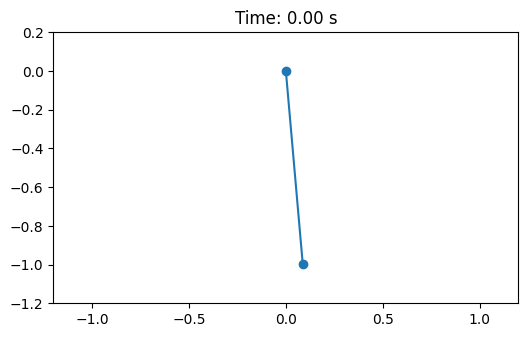

In [ ]:
#上課內容

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def simple_pendulum(t, y, L, g):
    """
    定義單擺的微分方程式。
    y[0] 是角度，y[1] 是角速度。
    """
    dydt = [y[1], -g/L * np.sin(y[0])]
    return dydt

# 單擺的參數
L = 1.0  # 擺長
g = 9.8  # 重力加速度

# 初始條件：初始角度和初始角速度
theta0 = np.radians(5)  # 初始角度（45度）
omega0 = 0.0  # 初始角速度

# 定義時間範圍
t_span = (0, 10)  # 從 t=0 到 t=10

# 解微分方程
sol = solve_ivp(simple_pendulum, t_span, [theta0, omega0], args=(L, g), t_eval=np.linspace(0, 10, 1000))

# 創建動畫
fig, ax = plt.subplots(figsize=(6, 6))

# 定義更新函數
def update(i):
    ax.clear()
    # 繪製單擺
    x = L * np.sin(sol.y[0, i])
    y = -L * np.cos(sol.y[0, i])
    ax.plot([0, x], [0, y], marker='o')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 0.2)
    ax.set_aspect('equal')
    ax.set_title(f'Time: {sol.t[i]:.2f} s')

# 創建動畫
ani = FuncAnimation(fig, update, frames=len(sol.t), interval=50)

# 顯示動畫
from IPython.display import HTML
HTML(ani.to_html5_video())


以上的程式碼，是參照chatgpt: https://chat.openai.com/share/ff1418dc-c688-4adf-ab21-56c7f34c7d6e


In [ ]:
#自己寫的

import numpy as np
import matplotlib.pyplot as plt

a0 = 2.0 
dt = 0.1 
num_steps = 5000

# 初始化數據
t = np.zeros(num_steps)
v = np.zeros(num_steps)

t[0] = 0
v[0] = 0

for i in range(1, num_steps):
    t[i] = t[i-1] + dt
    v[i] = v[i-1] + a0 * dt

# 繪製
plt.figure(figsize=(10, 6))
plt.plot(t, v, label='Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#用 vpython 模擬 ( 但 colab 好像不能執行可以用 https://www.glowscript.org/ 這個網站)
#執行出來的樣子 : https://www.glowscript.org/#/user/leeeee/folder/Vpython%E8%88%87%E7%89%A9%E7%90%86%E6%A8%A1%E6%93%AC/program/%E4%B8%80%E7%B6%AD%E9%81%8B%E5%8B%95

from vpython import*

''' Constant '''
size=0.5
dt=0.001
t=0

''' 建立物件 '''
ball=sphere(pos=vector(0,0,0),radius=size,color=color.magenta,v=vector(4,0,0),a=vector(-2,0,0))

''' xt 圖 '''
pic_xt=graph(title='x vs t',width=300,height=300,xtitle='t',ytitle='x',foreground=color.black,background=color.white,xmax=5,xmin=0,ymax=5,ymin=-5,align='left')

x_t=gcurve(color=color.blue)

''' vt 圖 '''
pic_vt=graph(title='v vs t',width=300,height=300,xtitle='t',ytitle='v',foreground=color.black,background=color.white,xmax=5,xmin=0,ymax=6,ymin=-6,align='left')

v_t=gcurve(color=color.red)

''' at 圖 '''
pic_at=graph(title='a vs t',width=300,height=300,xtitle='t',ytitle='a',foreground=color.black,background=color.white,xmax=5,xmin=0,ymax=4,ymin=-4,align='left')

a_t=gcurve(color=color.green)


while t<=5:
    rate(1000)
        
    ''' 更改球的位置與速度'''
    ball.pos=ball.pos+ball.v*dt
    ball.v+=ball.a*dt
    
    t=t+dt # 經過時間
    
    ''' 畫圖'''
    x_t.plot(pos=(t,ball.pos.x))
    v_t.plot(pos=(t,ball.v.x))
    a_t.plot(pos=(t,ball.a.x))



任務五：刻畫一個或多個物體的運動

實際問題

球落地後反彈

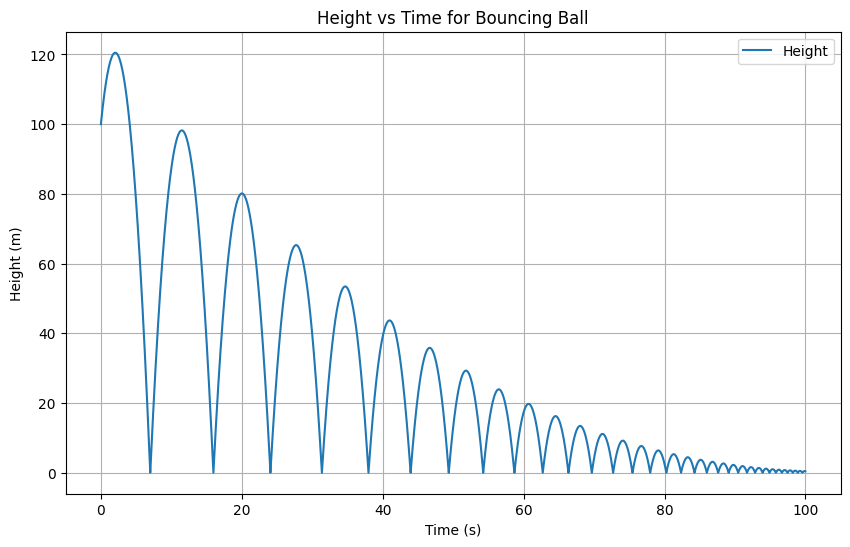

In [27]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.8  
e = 0.9  

dt = 0.01
num_steps = 10000

t = np.zeros(num_steps)
v = np.zeros(num_steps)
h = np.zeros(num_steps)

t[0] = 0
v[0] = 20  
h[0] = 100  


for i in range(1, num_steps):
    t[i] = t[i-1] + dt
    v[i] = v[i-1] - g * dt
    h[i] = h[i-1] + v[i-1] * dt
    if h[i] <= 0:
        h[i] = 0 
        v[i] = -v[i] * e 
        if abs(v[i]) < 0.1: 
            break

plt.figure(figsize=(10, 6))
plt.plot(t, h, label='Height')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Height vs Time for Bouncing Ball')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
#用 vpython 模擬 ( 但 colab 好像不能執行可以用 https://www.glowscript.org/ 這個網站)
#執行出來的樣子 : https://www.glowscript.org/#/user/leeeee/folder/Vpython%E8%88%87%E7%89%A9%E7%90%86%E6%A8%A1%E6%93%AC/program/%E7%90%83%E8%90%BD%E5%9C%B0%E5%BE%8C%E5%8F%8D%E5%BD%88

from vpython import*

''' Constant '''
g=vector(0,-10,0) # 題目給的重力加速度
size=0.8
dt=0.001
t=0

''' 建立物件 '''
scene=canvas(width=600,height=600,x=0,y=0,center=vector(0,15,0),background=vector(0.8,0.8,0.8))

floor=box(pos=vector(0,-size,0),length=20,height=0.01,width=10,color=color.blue) 

ball=sphere(pos=vector(0,0,0),radius=size,color=color.red,v=vector(0,20,0))

v_arrow=arrow(pos=ball.pos+vector(2,0,0),axis=ball.v*0.15,color=color.red) #球速的箭頭


while True:
    rate(1/dt)
    t+=dt
    
    ball.pos+=ball.v*dt
    ball.v+=g*dt
    v_arrow.pos=ball.pos+vector(2,0,0)
    v_arrow.axis=0.15*ball.v
    
    ''' 落地反彈 '''
    if ball.pos.y<=size and ball.v.y<=0:
        ball.v.y=-ball.v.y
        ball.v.y*=0.9 #反彈消耗能量 -> 速度變小
    
    '''停止條件'''
    if round( ball.v.y ) == 0 and ball.pos.y == 0:
        break 